In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# https://www.kaggle.com/datasets/thedevastator/exploring-risk-factors-for-cardiovascular-diseas
# En este dataset nos interesa saber el estilo de vida de una persona para predecir la presencia o ausencia de una enfermedad cardiovascular
# Variables a utilizar: Presion sistolica, peso, si lleva o no una vida activa
data = pd.read_csv('./heart_data.csv').head(1000)
data[['ap_hi','weight','active']]

,ap_hi,weight,active
0,110,62.0,1
1,140,85.0,1
2,130,64.0,0
3,150,82.0,1
4,100,56.0,0
...,...,...,...
995,110,64.0,0
996,120,78.0,1
997,140,56.0,1
998,150,74.0,0


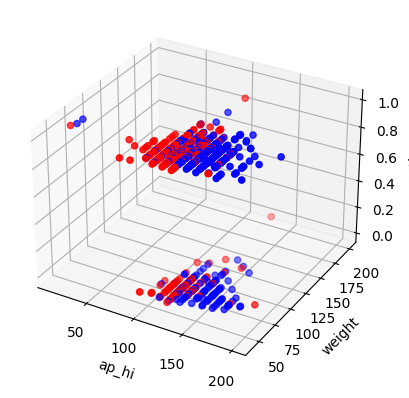

In [ ]:
# Graficamos los datos en un plano en 3D
# rojo: presencia de enfermedad cardiovascular
# azul: ausencia de enfermedad cardiovascular

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['b' if c == 1 else 'r' for c in data['cardio']]

ax.scatter(data['ap_hi'], data['weight'], data['active'], c=colors)

ax.set_xlabel('ap_hi')
ax.set_ylabel('weight')
ax.set_zlabel('active')

plt.show()

In [83]:
# Algoritmo Perceptron

#def activacion(x):
  # Funcion sigmoide
  #print (1.0 / (1.0 + np.exp(-x)))
  #return 1.0 / (1.0 + np.exp(-x))"""

def productoPunto(features, weights):
  return np.dot(features, weights)

def activacion(x):
  if x > 0:
    return 1
  else:
    return 0

def algPerceptron(data, clase):
  # recibe el peso, data y sesgo
  w = np.random.uniform(-1, 1, size=3)
  sesgo = np.random.uniform(-1,1)
  tasa = 0.01
  iteraciones = 100
  df = pd.DataFrame(data)
  cf = pd.DataFrame(clase)
  for iter in range(iteraciones):
    error_t = 0
    for i in range(len(df)):
      v = np.array(df.iloc[i])
      c = np.array(cf.iloc[i])
      prediccion = activacion(productoPunto(v, w) + sesgo)
      error = c[0] - prediccion
      error_t += error**2
      w[0] += tasa * v[0] * error
      w[1] += tasa * v[1] * error
      w[2] += tasa * v[2] * error
      sesgo += tasa * error
    print(error_t, end=" ")

algPerceptron(data[['ap_hi','weight','active']],data[['cardio']])

#algPerceptron(np.array([[0.3, 0.4], [0.4, 0.3],
#                        [0.3, 0.2], [0.4, 0.1],
#                        [0.5, 0.2], [0.4, 0.8],
#                        [0.6, 0.8], [0.5, 0.6],
#                        [0.7, 0.6], [0.8, 0.5]]), 
#                        np.array([[0],[0],[0],[0],[0],[1],[1],[1],[1],[1]]))



501 495 492 506 499 491 500 508 485 508 491 506 507 491 506 497 486 491 491 492 502 506 496 492 503 499 506 492 503 492 494 498 490 496 496 483 491 498 490 492 494 494 486 495 486 495 486 488 502 501 498 495 489 500 495 495 485 495 490 498 491 499 481 490 500 494 495 489 496 502 498 502 495 487 495 483 484 495 498 486 497 493 494 494 494 502 495 492 489 495 485 503 492 487 479 492 493 488 507 499 